# Walkrun — Data Analysis Report
**Project ID:**  PRCP-1013-WalkRunClass  

**Topic:** WalkRunClassification 

**Project Team:** PTID-CDS-DEC-25-3623


# Business case  :
* The project's objective is to create a reliable prediction model for accurately determining whether a person is running or walking based on predictor factors from motion sensor readings.  

* Extensive data analysis, model creation, and evaluation are integral components of the project, providing valuable insights into user actions and supporting real-world applications like activity monitoring, fitness tracking, and health assessment.  

* Improve the precision of activity recognition to provide users with more accurate feedback on their physical activities.  

* The increased demand for personalized fitness and health monitoring solutions, driven by wearable gadgets and smartphones with motion sensors, underscores the significance of constructing accurate activity categorization models.  

* Implementing a walking-running classification system not only addresses the growing demand for health-conscious technologies but also opens opportunities for data-driven insights and personalized user experiences. The system's success will be measured by its accuracy, user engagement, and positive impact on users' health and fitness journeys.

# Domain analysis :   
  
This dataset comprises accelerometer and gyroscope data corresponding to instances of walking and running. The objective is to develop an LSTM (Long Short-Term Memory) model capable of predicting the body's state based on sensor inputs. Thus, we have constructed a model designed to determine whether a person is walking or running, leveraging data from both the left and right accelerometers and gyroscopes.
 
**Accelerometer:**  
An accelerometer is a sensor that measures the acceleration of an object. Acceleration is the rate at which velocity changes over time, and an accelerometer monitors and quantifies this change.  

**Gyroscope:**  
A gyroscope is a type of sensor that detects the rate of rotation or angular velocity around a fixed axis. It assists in determining an object's orientation in three-dimensional space by sensing variations in rotational movement.
 
![1.webp](attachment:1.webp)
  
**The attributes provides in the dataset:**    
**Date and Time:** It provides information on the calendar date and clock timestamp, respectively, for recorded motion sensor readings, enabling analysis of activities over specific days with a temporal perspective..  
**Username:** Identification of users contributing to the dataset.  
**Wrist:** Identifies the wrist (left or right) where the sensor is placed.  
**Activity:** The target variable indicating whether the user is walking or running.  
**Acceleration and Gyro Readings:** Raw sensor data capturing movement along different axes.  

In [1]:
#importing the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,accuracy_score,f1_score,precision_score,recall_score

In [2]:
#importing the walkrun csv file
df=pd.read_csv('walkrun.csv')

# Basic Checks

In [3]:
# To get the basic information about the file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [4]:
#To get the statistical information about the numeric data
df.describe()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


In [5]:
#To get the statistical information about the categorical data
df.describe(include='O')

,date,time,username
count,88588,88588,88588
unique,12,88588,1
top,2017-7-16,13:51:15:847724020,viktor
freq,20480,1,88588


In [6]:
df.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [7]:
df.tail()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755
88587,2017-7-9,20:9:16:117410004,viktor,0,0,0.3140,-0.8008,-0.0911,0.1183,1.0850,1.2814


In [8]:
#The dataset do not have any null values
df.isnull().sum()

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

In [9]:
df.activity.unique()

array([0, 1], dtype=int64)

In [10]:
df.wrist.unique()

array([0, 1], dtype=int64)

In [11]:
# checking the number of unique values in each column
for i in df:
    print(i,'--------',df[i].nunique())

date -------- 12
time -------- 88588
username -------- 1
wrist -------- 2
activity -------- 2
acceleration_x -------- 30307
acceleration_y -------- 23957
acceleration_z -------- 19698
gyro_x -------- 40988
gyro_y -------- 38957
gyro_z -------- 51296


In [12]:
df.columns

Index(['date', 'time', 'username', 'wrist', 'activity', 'acceleration_x',
       'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z'],
      dtype='object')

In [13]:
#The column "username" holds only a single distinct value, rendering it non-informative. Hence, it can be dropped as it does not provide any meaningful insights.
df.drop('username',axis=1,inplace=True)

## Exploratory Data Analyis
* Exploratory Data Analysis (EDA) is a crucial step in understanding and summarizing a dataset. Its primary objective is to use a combination of statistical and graphical techniques to uncover patterns, relationships, anomalies, and potential insights within the data. Through EDA, analysts can form hypotheses, detect data quality issues, and make informed decisions about the subsequent stages of the analysis pipeline. By leveraging descriptive statistics, visualizations, and exploratory techniques, EDA establishes a foundational understanding that paves the way for more advanced analyses and modeling.

### Univariate Analysis
* Univariate Analysis is centered on exploring and summarizing the characteristics of an individual variable within a dataset. Its primary aim is to gain insights into the distribution and central tendency of that specific variable.

**Histogram:**

* Description: A histogram is a visual tool that illustrates the distribution of a continuous dataset by dividing it into bins or intervals.  
* Components:
    - Vertical bars represent the frequency or count of observations within each bin.
    - Bins categorize data points based on their values.
    - The shape of the histogram provides insights into the data distribution, including aspects like skewness or kurtosis.  

**Countplot:**  

* Description: A countplot is a variation of a bar plot designed to display the counts of observations within different categories of a categorical variable.
* Components:
    - Vertical bars represent the occurrence counts for each category.
    - It is especially beneficial for visualizing the distribution of categorical data, offering a straightforward way to observe and compare the frequencies of different categories.

In [14]:
df.columns

Index(['date', 'time', 'wrist', 'activity', 'acceleration_x', 'acceleration_y',
       'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z'],
      dtype='object')

In [15]:
df1=df[['acceleration_x',
       'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']]

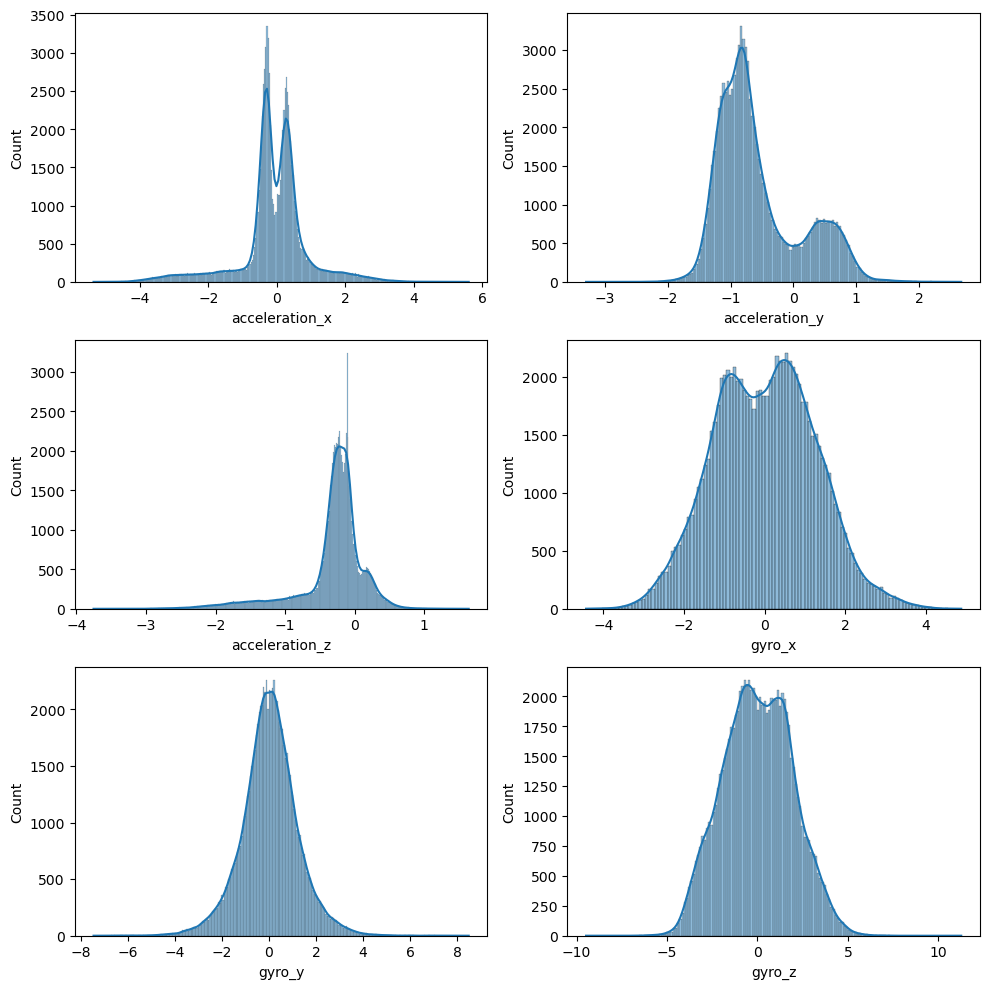

In [16]:
plt.figure(figsize=(10,10))
plotnumber=1
for i in df1:
    plt.subplot(3,2,plotnumber)
    sns.histplot(df1[i],kde=True)
    plotnumber=plotnumber+1
plt.tight_layout()

**The histogram plot provides significant insights:**  
 
**Acceleration_x:** The majority of readings are concentrated in the range of -1 to 0.  
**Acceleration_y:** In this context, it can be stated that the majority falls within the range of -1.5 to -0.5.  
**Acceleration_z:**  The readings for this parameter fall within the range of 0.5 to 0.  
**Gyro_x:** It can be asserted that the majority of values fall within the range of -1 to 1.  
**Gyro_y:** The data for this parameter exhibits a normal distribution.  
**Gyro_z:**  The majority of readings fall within the range of -3 to 3.

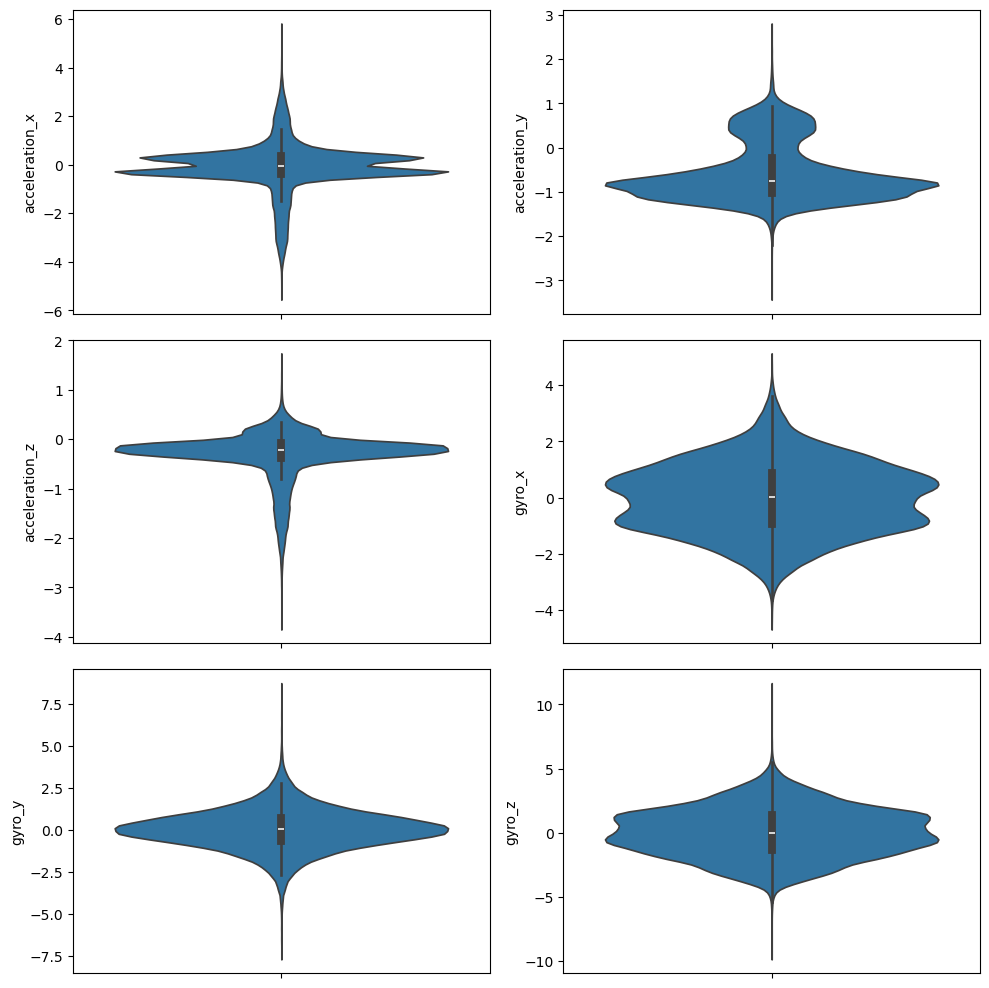

In [17]:
plt.figure(figsize=(10,10))
plotnumber=1
for i in df1:
    plt.subplot(3,2,plotnumber)
    sns.violinplot(df1[i])
    plotnumber=plotnumber+1
plt.tight_layout()

In [18]:
df2=df[['wrist', 'activity']]

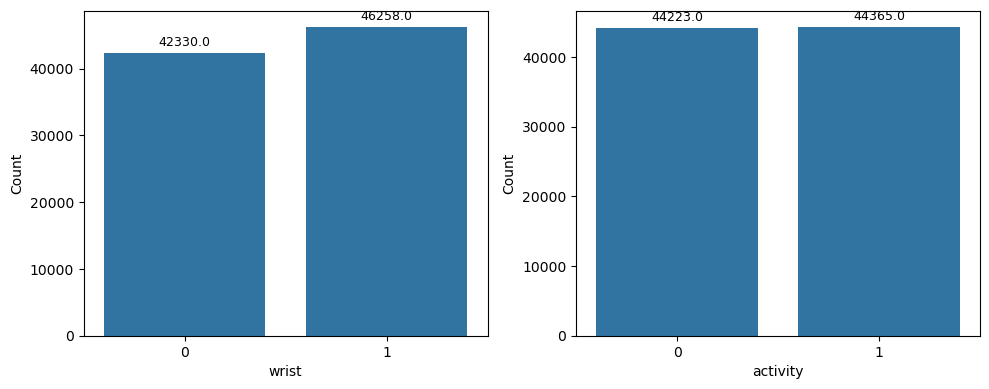

In [19]:
plt.figure(figsize=(10, 4))

plotnumber = 1
for i in df2.columns:
    plt.subplot(1, 2, plotnumber)
    ax = sns.countplot(x=df2[i])
    
    # Add count annotations on each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=9, color='black', xytext=(0, 5),
                    textcoords='offset points')
        
    plt.xlabel(i)
    plt.ylabel('Count')    
    plotnumber += 1

plt.tight_layout()
plt.show()

**The count plot above offers valuable insights :**  

* The "activity" column encodes "0" as "walking" and "1" as "running".
    * Activity:  The graph indicates that approximately 49.91% of individuals are engaged in walking, while around 50.08% are involved in running.  
 
* The "wrist" column encodes "0" as "left wrist" and "1" as "right wrist".  
  * Wrist: The graph illustrates that roughly 47.78% of individuals wear it on the left wrist, whereas approximately 52.22% wear it on the right wrist.

### Bivariate Analysis
* Bivariate analysis involves the analysis of two variables to understand the relationships between them. It helps to explore the interactions and associations between pairs of variables.  

**Scatter Plots** are used for visualizing relationships between two continuous variables.  
**Barplots** specifically use bars to represent the counts or proportions of categories in categorical data, providing a straightforward comparison.   

In [20]:
df1

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...
88583,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


In [21]:
df3=df[['acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z','activity']]

In [22]:
df

,date,time,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...,...,...,...
88583,2017-7-9,20:9:15:317911028,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


In [23]:
df.activity.unique()

array([0, 1], dtype=int64)

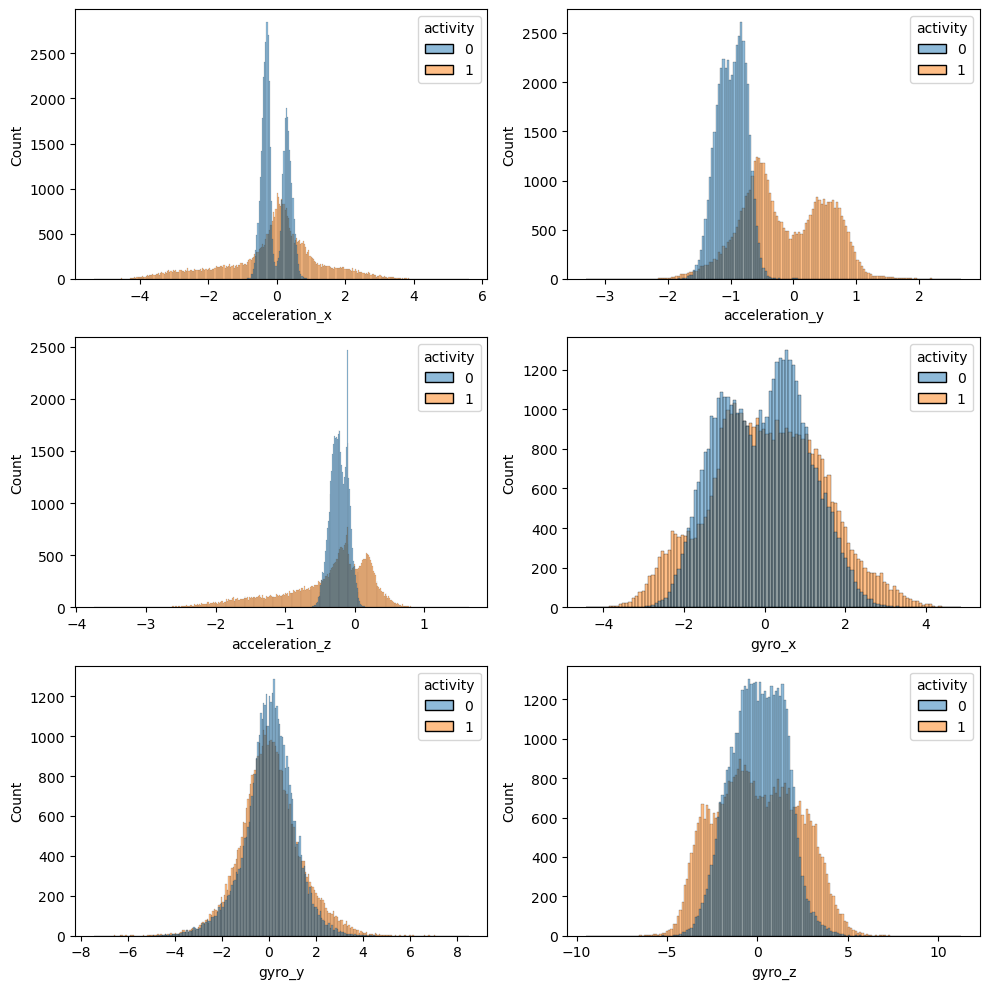

In [24]:
plt.figure(figsize=(10,10))
plotnumber=1
for i in df1:
    plt.subplot(3,2,plotnumber)
    sns.histplot(x=df1[i], hue=df['activity'])
    plotnumber=plotnumber+1
plt.tight_layout()

#### Insights:
* Within the range of -1 to +1 in the acceleration_x column, it is challenging to differentiate between walking and running activities. However, when the values fall below -1 or exceed +1, it becomes evident that the person is engaged in running.

* Within the range of -0.5 to -1.7 in the acceleration_y column, distinguishing between walking and running activities is ambiguous. However, when the values surpass -0.5, it becomes apparent that the person is running.  

* Within the range of -0.6 to +0.1 in the acceleration_z column, discerning between walking and running activities is challenging. However, when the values fall below -0.6 or exceed +0.1, it becomes evident that the person is engaged in running.  

* Upon reviewing gyro_x, gyro_y, and gyro_z, we find that the graphs overlap extensively, making it challenging to extract meaningful insights from their visual representation.

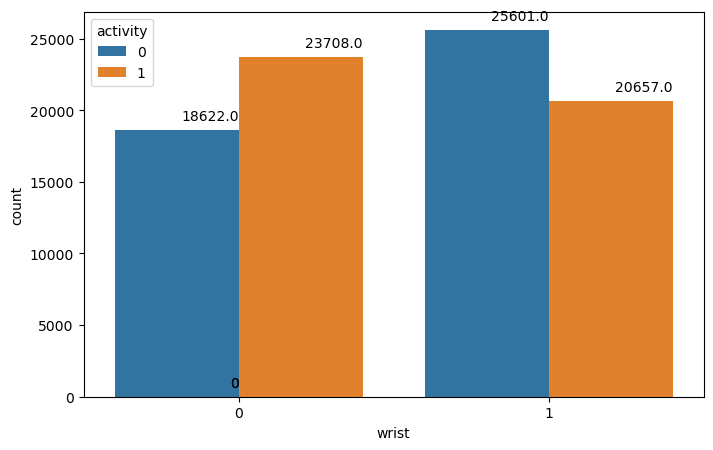

In [25]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x=df['wrist'], hue=df['activity'])

# Add labels on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 1, p.get_height()),
                ha='right', va='center', xytext=(0, 10), textcoords='offset points')


**Insights:**
* Individuals who wear it on their left hand are predominantly engaged in running, whereas those who wear it on the right hand are mostly walking.  
* Out of the total, 52.22% of individuals choose to wear it on their right hand, where 23.31% are involved in running, and 28.89% are walking.  
* Out of the total, 47.78% of individuals opt to wear it on their left hand, where 26.76% are involved in running, and 21.02% are walking.

### DATA PREPROCESSING

#### HANDLING WITH NULL VALUES AND CORRUPTED DATA

In [26]:
df.isnull().sum()

date              0
time              0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

**Since there are no null values present in the data, there is no requirement to address or handle them.**







In [27]:
df.columns

Index(['date', 'time', 'wrist', 'activity', 'acceleration_x', 'acceleration_y',
       'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z'],
      dtype='object')

### Handling with Outliers

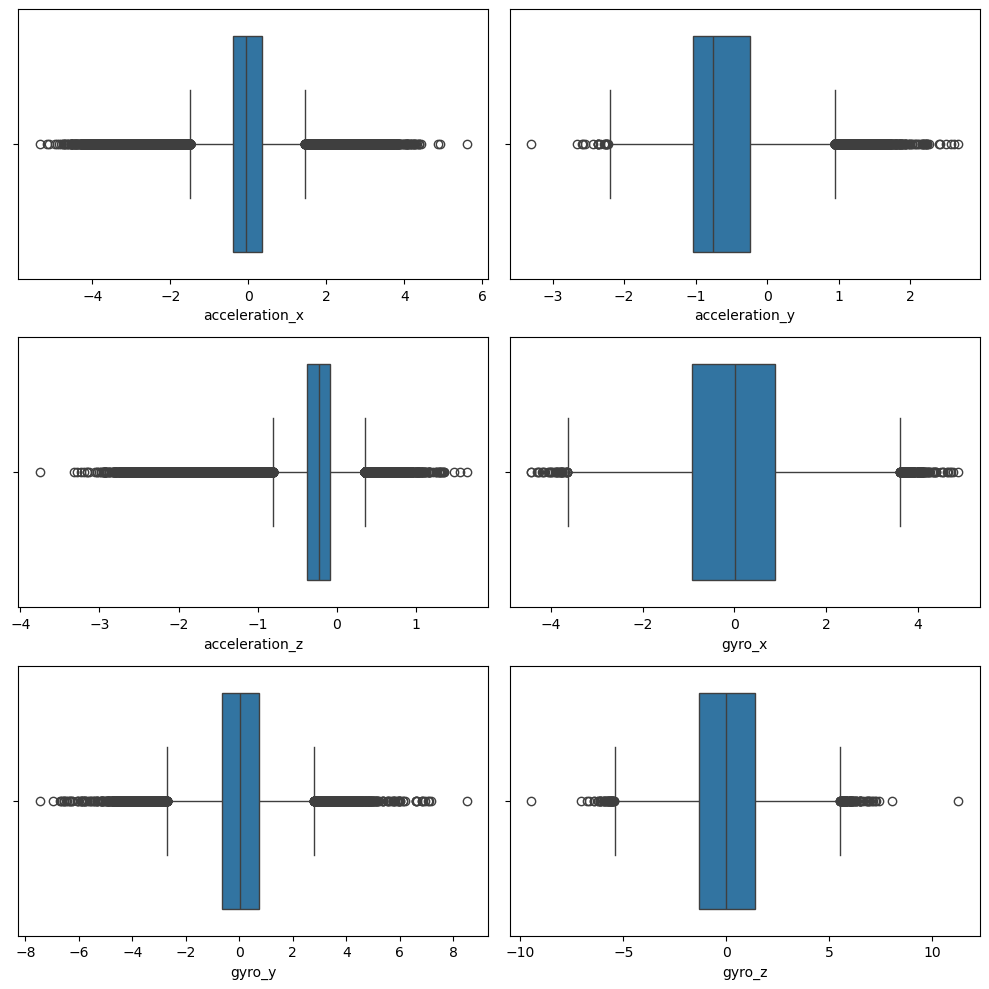

In [28]:
plt.figure(figsize=(10,10))
plotnumber=1
for i in df1:
    plt.subplot(3,2,plotnumber)
    sns.boxplot(df1[i],orient='h')
    plotnumber=plotnumber+1
    plt.xlabel(i)
plt.tight_layout()

In [29]:
df.loc[df.acceleration_x>4.4,'acceleration_x']=np.median(df.acceleration_x)

In [30]:
df.loc[df.acceleration_y<-3,'acceleration_y']=np.median(df.acceleration_y)

In [31]:
df.loc[df.acceleration_z<-3.5,'acceleration_z']=np.median(df.acceleration_z)

In [32]:
df.loc[df.acceleration_z>1.4,'acceleration_z']=np.median(df.acceleration_z)

In [33]:
df.loc[df.gyro_y<-7,'gyro_y']=np.median(df.gyro_y)

In [34]:
df.loc[df.gyro_y>8,'gyro_y']=np.median(df.gyro_y)

In [35]:
df.loc[df.gyro_z>10,'gyro_z']=np.median(df.gyro_z)

In [36]:
df.loc[df.gyro_z<-9,'gyro_z']=np.median(df.gyro_z)

### Handling with date column

In [37]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [38]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day


In [39]:
df.columns

Index(['date', 'time', 'wrist', 'activity', 'acceleration_x', 'acceleration_y',
       'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z', 'year', 'month', 'day'],
      dtype='object')

In [40]:
df.year.nunique()

1

In [41]:
df.drop(['date','year'],axis=1,inplace=True)

### Handling with Time column

In [42]:
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S:%f')
df['time'] = df['time'].dt.hour + df['time'].dt.minute / 60 + df['time'].dt.second / 3600


In [43]:
df

,time,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,month,day
0,13.854167,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,6,30
1,13.854444,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,6,30
2,13.854444,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,6,30
3,13.854444,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,6,30
4,13.854444,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,6,30
...,...,...,...,...,...,...,...,...,...,...,...
88583,20.154167,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048,7,9
88584,20.154167,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761,7,9
88585,20.154167,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616,7,9
88586,20.154167,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755,7,9


### Conversion of categorical data into numeric data

**Since all the columns contain numeric values, this step is unnecessary.**

### Scaling

## Feature Selection

In [44]:
df.drop('activity',axis=1).corr()

,time,wrist,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,month,day
time,1.000000,-0.270552,0.097456,0.490267,-0.183534,0.036793,0.024668,-0.008952,-0.201413,-0.082909
wrist,-0.270552,1.000000,-0.609688,0.087141,0.323648,-0.022092,-0.068446,0.008810,0.227086,0.437214
acceleration_x,0.097456,-0.609688,1.000000,-0.265214,-0.552286,-0.021857,-0.003699,-0.060568,-0.174344,-0.246044
acceleration_y,0.490267,0.087141,-0.265214,1.000000,0.106246,0.010513,0.072249,-0.023046,-0.026154,0.011223
acceleration_z,-0.183534,0.323648,-0.552286,0.106246,1.000000,0.034930,-0.020985,0.049554,0.048078,0.243738
gyro_x,0.036793,-0.022092,-0.021857,0.010513,0.034930,1.000000,0.093952,0.317810,-0.012304,-0.009496
gyro_y,0.024668,-0.068446,-0.003699,0.072249,-0.020985,0.093952,1.000000,0.287453,-0.017164,-0.032960
gyro_z,-0.008952,0.008810,-0.060568,-0.023046,0.049554,0.317810,0.287453,1.000000,0.003321,0.005717
month,-0.201413,0.227086,-0.174344,-0.026154,0.048078,-0.012304,-0.017164,0.003321,1.000000,-0.607614
day,-0.082909,0.437214,-0.246044,0.011223,0.243738,-0.009496,-0.032960,0.005717,-0.607614,1.000000


<Axes: >

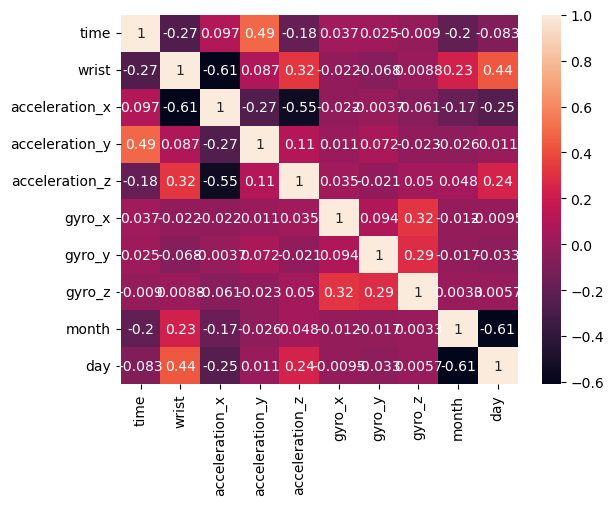

In [45]:
sns.heatmap(df.drop('activity',axis=1).corr(),annot=True)

## Model Creation

In [46]:
df.columns

Index(['time', 'wrist', 'activity', 'acceleration_x', 'acceleration_y',
       'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z', 'month', 'day'],
      dtype='object')

In [47]:
#splitting the data into x and y
x=df.drop('activity',axis=1)
y=df['activity']

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [49]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(66441, 10)
(66441,)
(22147, 10)
(22147,)


### BALANCING

In [50]:
df['activity'].value_counts()

activity
1    44365
0    44223
Name: count, dtype: int64

**Balancing is not required since the dataset is already evenly distributed, with 1 comprising 50.08% and 0 comprising 49.91%.**

# Model Creation By Using Logistic_Regression

In [51]:
lr = LogisticRegression(multi_class='ovr')

In [52]:
lr.fit(x_train,y_train)

LogisticRegression(multi_class='ovr')

In [53]:
y_pred_lr = lr.predict(x_test)

In [54]:
y_pred_lr_train = lr.predict(x_train)

# Model Evaluation Logistic_Regression

In [55]:
print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_lr)}")

 accuracy_score for test data : 0.952137987086287


In [56]:
print(f" accuracy_score for train data : {accuracy_score(y_train,y_pred_lr_train)}")

 accuracy_score for train data : 0.95043723002363


In [57]:
print("precision_score for test data:",precision_score(y_test,y_pred_lr,average='weighted'))

precision_score for test data: 0.9525315926445709


In [58]:
print("recall_score for test data:",recall_score(y_test,y_pred_lr,average='weighted'))

recall_score for test data: 0.952137987086287


In [59]:
print(f"classification_report for test data : {classification_report(y_test,y_pred_lr)}")

classification_report for test data :               precision    recall  f1-score   support

           0       0.97      0.94      0.95     11162
           1       0.94      0.97      0.95     10985

    accuracy                           0.95     22147
   macro avg       0.95      0.95      0.95     22147
weighted avg       0.95      0.95      0.95     22147



In [60]:
print(f"classification_report for train data : {classification_report(y_train,y_pred_lr_train)}")

classification_report for train data :               precision    recall  f1-score   support

           0       0.96      0.94      0.95     33061
           1       0.94      0.96      0.95     33380

    accuracy                           0.95     66441
   macro avg       0.95      0.95      0.95     66441
weighted avg       0.95      0.95      0.95     66441



## Model Creation by using KNN-Classifier

In [61]:
# Running the model with different nearest neighbours number to check which will gives us least error rate
err_rate = []
for i in range(1,11):
    knn1 = KNeighborsClassifier(n_neighbors= i,n_jobs=-1)
    knn1.fit(x_train,y_train)
    y_pred1 = knn1.predict(x_test)
    error_rate = (y_test !=y_pred1).sum()/len(y_test) * 100
    err_rate.append(error_rate)
print(err_rate)

[0.3115546123628482, 0.4199214340542737, 0.3115546123628482, 0.3837991601571319, 0.37476859168284643, 0.4199214340542737, 0.40186029710570276, 0.46507427642570104, 0.4199214340542737, 0.4605589921885583]


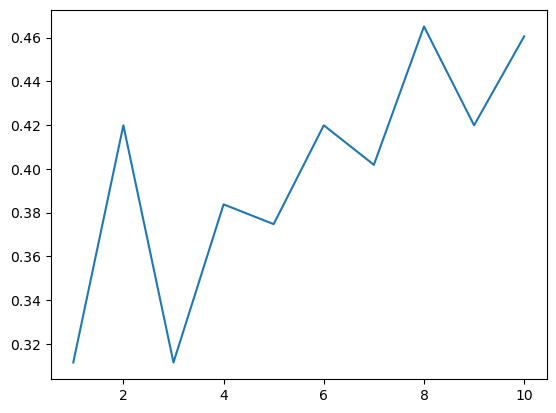

In [62]:
# plotting to check the nearest neighbours with least error rate
plt.plot(range(1,11),err_rate)
plt.show()

In [63]:
knn = KNeighborsClassifier(5)

In [64]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [65]:
y_pred_knn = knn.predict(x_test)

In [66]:
y_pred_knn_train = knn.predict(x_train)

# Model Evaluation KNN - Classifier

In [67]:
print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_knn)}")
print(f" accuracy_score for train data : {accuracy_score(y_train,y_pred_knn_train)}")

 accuracy_score for test data : 0.9962523140831715
 accuracy_score for train data : 0.9979982239882


In [68]:
print(f"classification_report for test data : {classification_report(y_test,y_pred_knn)}")
print(f"classification_report for train data : {classification_report(y_train,y_pred_knn_train)}")

classification_report for test data :               precision    recall  f1-score   support

           0       0.99      1.00      1.00     11162
           1       1.00      0.99      1.00     10985

    accuracy                           1.00     22147
   macro avg       1.00      1.00      1.00     22147
weighted avg       1.00      1.00      1.00     22147

classification_report for train data :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     33061
           1       1.00      1.00      1.00     33380

    accuracy                           1.00     66441
   macro avg       1.00      1.00      1.00     66441
weighted avg       1.00      1.00      1.00     66441



In [69]:
print("precision_score for test data:",precision_score(y_test,y_pred_knn,average='weighted'))

precision_score for test data: 0.9962590071008431


In [70]:
print("recall_score for test data:",recall_score(y_test,y_pred_knn,average='weighted'))

recall_score for test data: 0.9962523140831715


**Upon examining the variance in evaluation scores between our training and testing datasets, it has become evident that our model is experiencing overfitting. In response to this observation, we are now engaged in the process of hyperparameter tuning to enhance our model's performance and achieve more favorable evaluation scores.**

## Hyperparameter Tuning - KNN

In [71]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  
}

In [72]:
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy',n_jobs=-1)
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [73]:
grid_search.best_params_

{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

In [74]:
best_knn_model = grid_search.best_estimator_

In [75]:
knn_pred = best_knn_model.predict(x_test)

In [76]:
accuracy = accuracy_score(y_test, knn_pred)
print("Accuracy of the Best Model:", accuracy)

Accuracy of the Best Model: 0.9975165936695715


In [77]:
print("precision_score for test data:",precision_score(y_test, knn_pred,average='weighted'))

precision_score for test data: 0.9975204376255311


In [78]:
print("recall_score for test data:",recall_score(y_test, knn_pred,average='weighted'))

recall_score for test data: 0.9975165936695715


# Model creation by using SVM-Classifier

In [79]:
svc = SVC()

In [80]:
svc.fit(x_train,y_train)

SVC()

In [81]:
y_pred_svc = svc.predict(x_test)

In [82]:
y_pred_svc_train = svc.predict(x_train)

# Model Evaluation SVM - Classifier

In [83]:
print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_svc)}")
print(f" accuracy_score for train data : {accuracy_score(y_train,y_pred_svc_train)}")

 accuracy_score for test data : 0.9609427913487154
 accuracy_score for train data : 0.9604461100826297


In [84]:
print("precision_score for test data:",precision_score(y_test,y_pred_svc,average='weighted'))

precision_score for test data: 0.9634610990659858


In [85]:
print("recall_score for test data:",recall_score(y_test,y_pred_svc,average='weighted'))

recall_score for test data: 0.9609427913487154


In [86]:
print(f"classification_report for test data : {classification_report(y_test,y_pred_svc)}")
print(f"classification_report for train data : {classification_report(y_train,y_pred_svc_train)}")

classification_report for test data :               precision    recall  f1-score   support

           0       1.00      0.92      0.96     11162
           1       0.93      1.00      0.96     10985

    accuracy                           0.96     22147
   macro avg       0.96      0.96      0.96     22147
weighted avg       0.96      0.96      0.96     22147

classification_report for train data :               precision    recall  f1-score   support

           0       1.00      0.92      0.96     33061
           1       0.93      1.00      0.96     33380

    accuracy                           0.96     66441
   macro avg       0.96      0.96      0.96     66441
weighted avg       0.96      0.96      0.96     66441



# Model Creation By Using Decision Tree Classifier

In [87]:
dtc = DecisionTreeClassifier()

In [88]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [89]:
y_pred_dtc= dtc.predict(x_test)

In [90]:
y_pred_dtc_train=dtc.predict(x_train)

# Model Evaluation Decision Tree

In [91]:
print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_dtc)}")
print(f" accuracy_score for train data : {accuracy_score(y_train,y_pred_dtc_train)}")

 accuracy_score for test data : 0.9957104799747144
 accuracy_score for train data : 1.0


In [92]:
print("precision_score for test data:",precision_score(y_test,y_pred_dtc,average='weighted'))

precision_score for test data: 0.9957105256482264


In [93]:
print("recall_score for test data:",recall_score(y_test,y_pred_dtc,average='weighted'))

recall_score for test data: 0.9957104799747144


In [94]:
print(f"classification_report for test data : {classification_report(y_test,y_pred_dtc)}")
print(f"classification_report for train data : {classification_report(y_train,y_pred_dtc_train)}")

classification_report for test data :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11162
           1       1.00      1.00      1.00     10985

    accuracy                           1.00     22147
   macro avg       1.00      1.00      1.00     22147
weighted avg       1.00      1.00      1.00     22147

classification_report for train data :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     33061
           1       1.00      1.00      1.00     33380

    accuracy                           1.00     66441
   macro avg       1.00      1.00      1.00     66441
weighted avg       1.00      1.00      1.00     66441



**Upon examining the variance in evaluation scores between our training and testing datasets, it has become evident that our model is experiencing overfitting. In response to this observation, we are now engaged in the process of hyperparameter tuning to enhance our model's performance and achieve more favorable evaluation scores.**

### HyperParameter Tuning for Decision Tree

In [95]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [96]:
# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='accuracy',n_jobs=-1)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

In [97]:
# Train the model with the best hyperparameters
best_dt_classifier = DecisionTreeClassifier(**best_params)
best_dt_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred = best_dt_classifier.predict(x_test)

In [98]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy for Decision Tree:", accuracy)


Test Accuracy for Decision Tree: 0.9938140605951145


# Model creation by using Random Forest Classifier

In [99]:
rfc=RandomForestClassifier()

In [100]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [101]:
y_pred_rfc=rfc.predict(x_test)

In [102]:
y_pred_rfc_train = rfc.predict(x_train)

# Model Evaluation Random Forest Classifier

In [103]:
print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_rfc)}")
print(f" accuracy_score for train data : {accuracy_score(y_train,y_pred_rfc_train)}")

 accuracy_score for test data : 0.9990066374678286
 accuracy_score for train data : 1.0


In [104]:
print("precision_score for test data:",precision_score(y_test,y_pred_rfc,average='weighted'))

precision_score for test data: 0.9990072321013164


In [105]:
print("recall_score for test data:",recall_score(y_test,y_pred_rfc,average='weighted'))

recall_score for test data: 0.9990066374678286


In [106]:
print(f"classification_report for test data : {classification_report(y_test,y_pred_rfc)}")
print(f"classification_report for train data : {classification_report(y_train,y_pred_rfc_train)}")

classification_report for test data :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11162
           1       1.00      1.00      1.00     10985

    accuracy                           1.00     22147
   macro avg       1.00      1.00      1.00     22147
weighted avg       1.00      1.00      1.00     22147

classification_report for train data :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     33061
           1       1.00      1.00      1.00     33380

    accuracy                           1.00     66441
   macro avg       1.00      1.00      1.00     66441
weighted avg       1.00      1.00      1.00     66441



### HyperParameter Tuning for Random_Forest

In [107]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}



In [108]:
# Use GridSearchCV to find the best hyperparameters
grid_search = RandomizedSearchCV(rfc, param_grid, cv=5, scoring='accuracy',n_jobs=-1)
grid_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='accuracy')

In [109]:
# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_rf_classifier = RandomForestClassifier(**best_params)
best_rf_classifier.fit(x_train, y_train)


RandomForestClassifier(criterion='entropy', max_features='log2',
                       min_samples_leaf=2, min_samples_split=5)

In [110]:
# Make predictions on the test set
y_pred_rfc = best_rf_classifier.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rfc)
print("Best Hyperparameters:", best_params)
print("Test Accuracy:", accuracy)

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None, 'criterion': 'entropy'}
Test Accuracy: 0.9989614846254572


# By using bagging base estimator is Decision Tree

In [112]:
model_bagg = BaggingClassifier(estimator=dtc,n_estimators=30,random_state=15,n_jobs=-1)
model_bagg.fit(x_train, y_train)
y_pred_bagg = model_bagg.predict(x_test)


In [113]:
y_pred_bagg_train=model_bagg.predict(x_train)

In [114]:
print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_bagg)}")
print(f" accuracy_score for train data : {accuracy_score(y_train,y_pred_bagg_train)}")

 accuracy_score for test data : 0.997561746511943
 accuracy_score for train data : 0.9999698981050857


In [115]:
print("precision_score for test data:",precision_score(y_test,y_pred_bagg,average='weighted'))

precision_score for test data: 0.9975634048401507


In [116]:
print("recall_score for test data:",recall_score(y_test,y_pred_bagg,average='weighted'))

recall_score for test data: 0.997561746511943


## Model creation by using  XGBoost

In [117]:
from xgboost import XGBClassifier
xgc=XGBClassifier() 
xgc.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [118]:
y_pred_xgc = xgc.predict(x_test)

In [119]:
y_pred_xgc_train= xgc.predict(x_train)

# Model Evaluation XGBoost Classifier

In [120]:
print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_xgc)}")
print(f" accuracy_score for train data : {accuracy_score(y_train,y_pred_xgc_train)}")

 accuracy_score for test data : 0.9996839301034
 accuracy_score for train data : 1.0


In [121]:
print("precision_score for test data:",precision_score(y_test,y_pred_xgc,average='weighted'))

precision_score for test data: 0.9996841313851755


In [122]:
print("recall_score for test data:",recall_score(y_test,y_pred_xgc,average='weighted'))

recall_score for test data: 0.9996839301034


In [123]:
# classification report for test data 
print(f"classification_report for test data : {classification_report(y_test,y_pred_xgc)}")
# classification report for train data 
print(f"classification_report for train data : {classification_report(y_train,y_pred_xgc_train)}")

classification_report for test data :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11162
           1       1.00      1.00      1.00     10985

    accuracy                           1.00     22147
   macro avg       1.00      1.00      1.00     22147
weighted avg       1.00      1.00      1.00     22147

classification_report for train data :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     33061
           1       1.00      1.00      1.00     33380

    accuracy                           1.00     66441
   macro avg       1.00      1.00      1.00     66441
weighted avg       1.00      1.00      1.00     66441



In [124]:
y_pred_xgc = xgc.predict(x_test)

y_pred_xgc_train= xgc.predict(x_train)
# classification report for test data 
print(f"classification_report for test data : {classification_report(y_test,y_pred_xgc)}")
# classification report for train data 
print(f"classification_report for train data : {classification_report(y_train,y_pred_xgc_train)}")

classification_report for test data :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11162
           1       1.00      1.00      1.00     10985

    accuracy                           1.00     22147
   macro avg       1.00      1.00      1.00     22147
weighted avg       1.00      1.00      1.00     22147

classification_report for train data :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     33061
           1       1.00      1.00      1.00     33380

    accuracy                           1.00     66441
   macro avg       1.00      1.00      1.00     66441
weighted avg       1.00      1.00      1.00     66441



# Model creation by using Neural Networks

## Model creation by using MLP Classifier

In [125]:
# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)



In [126]:
# Create the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', max_iter=1000, random_state=42)




In [127]:
# Train the model
mlp.fit(x_train, y_train)

# Make predictions on the test set
y_pred_mlp = mlp.predict(x_test)


In [128]:
# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred_mlp)
print(f'Test Accuracy for MLP Classifier: {accuracy}')

Test Accuracy for MLP Classifier: 0.9979229692509144


In [129]:
print("precision_score for test data:",precision_score(y_test,y_pred_mlp,average='weighted'))

precision_score for test data: 0.99792298849267


In [130]:
print("recall_score for test data:",recall_score(y_test,y_pred_mlp,average='weighted'))

recall_score for test data: 0.9979229692509144


## Model creation by using ANN

In [131]:
# Build the neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Assuming 3 classes for iris dataset
])


In [132]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [133]:
# Train the model
model.fit(x_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

Epoch 1/15
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9838 - loss: 0.0495 - val_accuracy: 0.9941 - val_loss: 0.0186
Epoch 2/15
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9944 - loss: 0.0161 - val_accuracy: 0.9958 - val_loss: 0.0133
Epoch 3/15
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9958 - loss: 0.0124 - val_accuracy: 0.9953 - val_loss: 0.0123
Epoch 4/15
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9963 - loss: 0.0108 - val_accuracy: 0.9957 - val_loss: 0.0123
Epoch 5/15
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9967 - loss: 0.0095 - val_accuracy: 0.9962 - val_loss: 0.0113
Epoch 6/15
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9968 - loss: 0.0089 - val_accuracy: 0.9962 - val_loss: 0.0117
Epoch 7/15
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9971 - loss: 0.0080 - val_accuracy: 0.9970 - val_loss: 0.0109
Epoch 8/15
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9975 - loss: 0.0075 - 

In [134]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)


693/693 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9974 - loss: 0.0091


In [135]:
print(f'\nTest Accuracy for ANN : {test_accuracy}')


Test Accuracy for ANN : 0.9973811507225037


### Model Comparison Report:  
**LogisticRegression Model:**  
Accuracy_score :0.952137987086287
Precision_score: 0.9525315926445709
Recall_score   :0.952137987086287  
* Logistic regression is known for its simplicity and interpretability, making it easy to understand and implement.  

**K Nearest Neighbors Classifier Model:**  
Accuracy_score : 0.9975165936695715  
Precision_score:0.9975204376255311    
Recall_score   :0.9975165936695715  
* KNN is able to handle  the non-linear relationships in data without making strong assumptions.  

**SVM Classifier Model:**  
Accuracy_score : 0.9609427913487154   
Precision_score:0.9634610990659858  
Recall_score: 0.9609427913487154  
* SVM's are effective in high-dimensional spaces and can handle non-linear relationships.  

**Decision Tree Classifier Model:**  
Accuracy_score :0.9938140605951145    
Precision_score:0.9990072321013164  
Recall_score:0.9957104799747144  
* Decision trees may be prone to overfitting, and their interpretability is a strength.  

**Random Forest Classifier Model:**  
Accuracy_score :0.9989614846254572    
Precision_score:0.9989621820777737  
Recall_score:0.9990066374678286 
* Random Forests are an ensemble method known for handling complex relationships and reducing overfitting.  

**Bagging using Decision Tree Classifier:**  
Accuracy_score 0.997561746511943  
Precision_score:0.9975634048401507  
Recall_score:0.997561746511943   
* Bagging reduces overfitting and improves model robustness,enhancing the generalization performance of the model.    

**XGBoost Classifier:**  
Accuracy_score :0.9996839301034  
Precision_score:0.9996841313851755  
Recall_score:0.9996839301034  
* XGBoost is a powerful boosting algorithm known for its efficiency and performance.  

**MLP:**  
Accuracy_score :0.9979229692509144  
Precision_score:0.99792298849267   
Recall_score:0.9979229692509144  

**ANN:**  
Accuracy_score :0.9973811507225037  



In [136]:
Models = ["Logistic Regression", "KNN", "SVM", "Decision Tree",
          "Random Forest", "Bagging", "XGBoost", "MLP", "ANN"]

Accuracy = [
    0.9521,
    0.9975,
    0.9609,
    0.9938,
    0.9990,
    0.9976,
    0.9997,
    0.9979,
    0.9974
]


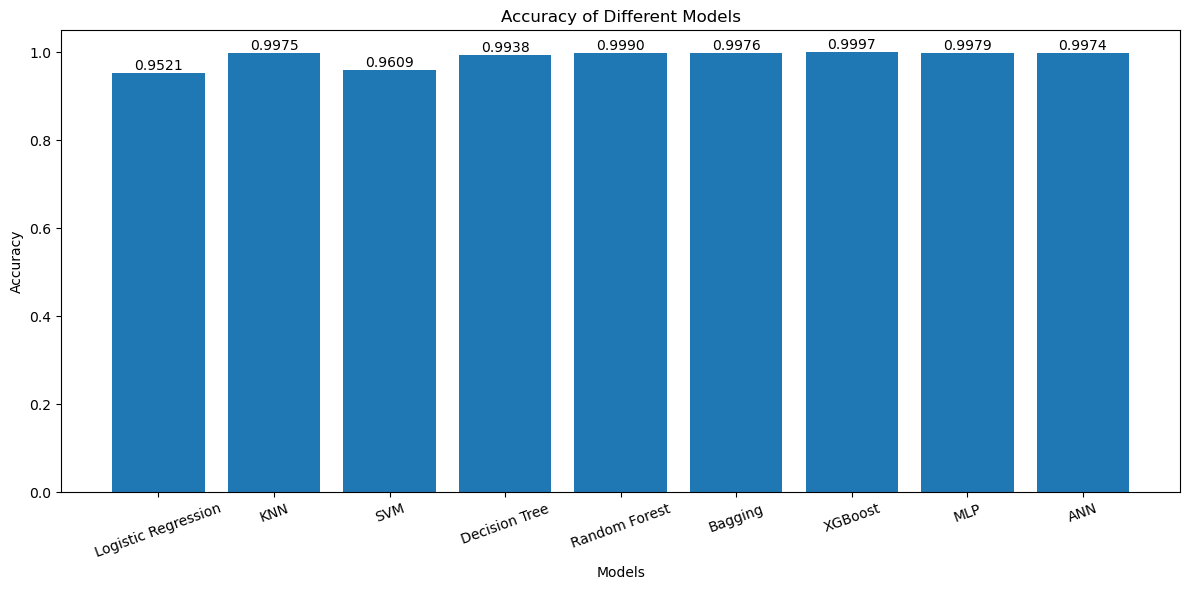

In [137]:
plt.figure(figsize=(12, 6))
bars = plt.bar(Models, Accuracy)
# Labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{height:.4f}",
        ha="center",
        va="bottom",
    )
plt.title("Accuracy of Different Models")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0, 1.05)
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

### Conclusion:

XGBoost emerges as the most effective model for accurately distinguishing between walking and running instances in our dataset. This determination underscores the significance of selecting a model that not only excels in accuracy but also demonstrates adaptability and reliability across different scenarios, making XGBoost the preferred choice for the walk-run classification task.

### Challenges Faced:
Navigating the walk-run dataset presented challenges, primarily centered around the complexities of managing the date and time columns. Addressing these intricacies required careful consideration and specialized handling, adding a layer of complexity to the overall data processing and analysis tasks.